In [5]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

import json
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr

qvalue = importr("qvalue")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Statistical Analysis And Multiple Hypothesis Correction For RGES Scores

This notebook implements a pipeline for plotting some statistics and producing tables with pvalues and qvalues based on the permutation testing.

## Score and Permutation Raw Data

In [12]:
## Chemical Perturbagens
SCORES_PATH = "/home/jovyan/oncogxA/Alex/l1k/LINCS_FULL_GEO_RANKED/LINCS_landmarks_python_scores.json"
PERMS_PATH = "/home/jovyan/oncogxA/Alex/l1k/LINCS_FULL_GEO_RANKED/GSE70138_perms.json"

## Loading Score and Permutation Raw Data

In [6]:
SCORES = json.loads(open(SCORES_PATH).read())
PERMS = json.loads(open(PERMS_PATH).read())

## Histogram of True Scores Data

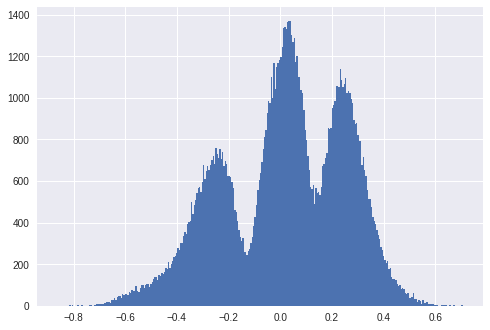

In [11]:
plt.hist(list(SCORES.values()), bins=300)
plt.show()

## Calculating P-values

This function calculates a pvalue given the name of a LINCS profile. The pvalue is calculated by dividing the number of permutation results more extreme than the true score by the number of permutations. If a score is negative, then a more extreme score would be smaller than the true score. If the score is positive, a more extreme score would be larger than the true score. A pvalue equal to ```0``` should be interpreted as ```< 1/#permutations```

In [ ]:
def get_pval(profname):
    true_score = SCORES[profname]
    perms_scores = PERMS[profname]